In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression_implementation import SimpleLinearRegression as MyLinearRegression, MultipleLinearRegressionQRMethod, MultipleLinearRegressionNormalMethod
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Simple Linear Regression

### Create random data

In [2]:
x,y = make_regression(n_samples=60, n_features=1, noise=20, random_state=11)

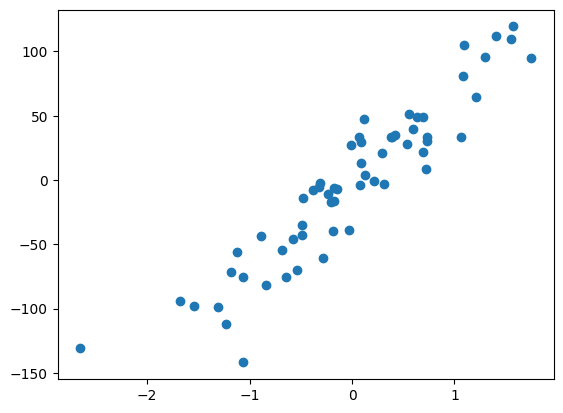

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10)

### Fit models

In [5]:
my_model = MyLinearRegression(y_train, x_train.reshape(x_train.shape[0]))
my_model.fit()
y_pred_my_model = my_model.predict(x_test.reshape(x_test.shape[0]))

alpha: 67.81114512058458
beta: -1.6300796421677104


In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred_model = model.predict(x_test)

In [8]:
df = pd.DataFrame({
    "y_real": y_test,
    "y_pred_my_model": y_pred_my_model,
    "y_pred_model": y_pred_model
})
df

,y_real,y_pred_my_model,y_pred_model
0,-111.997592,-85.196887,-85.196887
1,29.437407,4.403596,4.403596
2,-60.917448,-21.029017,-21.029017
3,-54.501025,-47.975378,-47.975378
4,30.735722,48.335708,48.335708
5,-11.257386,-17.718304,-17.718304
6,109.565389,103.414242,103.414242
7,35.026173,26.921852,26.921852
8,-4.102545,3.353581,3.353581
9,-0.946456,13.108551,13.108551


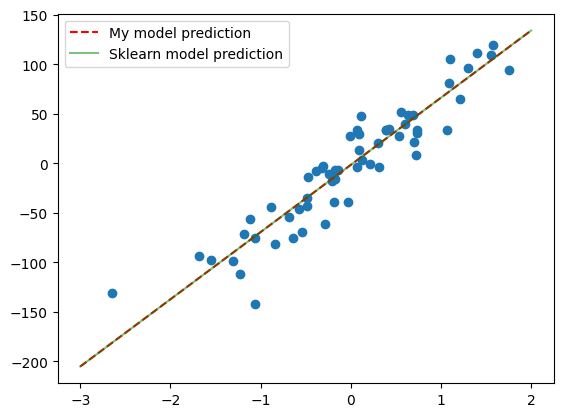

In [9]:
plt.scatter(x,y)
x_fit_my_model = np.linspace(np.floor(x.min()), np.ceil(x.max()),2)
y_fit_my_model = my_model.alpha * x_fit_my_model.reshape(x_fit_my_model.shape[0]) + my_model.beta
plt.plot(x_fit_my_model, y_fit_my_model, "r--", label="My model prediction")
x_fit_model = np.linspace(np.floor(x.min()), np.ceil(x.max()),2)
y_fit_model = model.coef_ * x_fit_model + model.intercept_
plt.plot(x_fit_model, y_fit_model, 'g-', alpha= 0.5, label="Sklearn model prediction")
plt.legend()
plt.show()

# Multiple Linear Regression

In [22]:
i ,j = make_regression(n_samples=250, n_features=20, noise=75, random_state=12)
i.shape, j.shape

((250, 20), (250,))

In [23]:
i_train, i_test, j_train, j_test = train_test_split(i,j,random_state=45)

### Fit models

#### Normal Method

In [24]:
model_1 = MultipleLinearRegressionNormalMethod(i_train, j_train)
model_1.fit()
j_pred_model_1 = model_1.predict(i_test)

#### QR decomposition method

In [25]:
model_2 = MultipleLinearRegressionQRMethod(i_train, j_train)
model_2.fit()
j_pred_model_2 = model_2.predict(i_test)

#### Sklearn Linear Regression

In [26]:
model_3 = LinearRegression()
model_3.fit(i_train, j_train)
j_pred_model_3 = model_3.predict(i_test)

In [27]:
df_1 = pd.DataFrame({
    "actual": j_test,
    "model_1": j_pred_model_1,
    "model_2": j_pred_model_2,
    "model_3": j_pred_model_3,
})
df_1

,actual,model_1,model_2,model_3
0,13.806947,25.446132,25.446132,26.183383
1,119.048485,92.542550,92.542550,93.641806
2,315.677570,219.473141,219.473141,220.891778
3,-129.400256,-271.440262,-271.440262,-269.899486
4,-94.739651,59.247333,59.247333,61.162241
...,...,...,...,...
58,35.467120,27.163211,27.163211,28.784637
59,-38.326209,44.686618,44.686618,46.306451
60,-8.546956,32.575242,32.575242,33.278429
61,292.809614,256.086727,256.086727,257.349922


### Evaluate models

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = []
mae = []
r2 = []

In [41]:
mse.extend(
    [
        mean_squared_error(j_test, j_pred_model_1),
        mean_squared_error(j_test, j_pred_model_2),
        mean_squared_error(j_test, j_pred_model_3)
    ]
)

In [42]:
mae.extend(
    [
        mean_absolute_error(j_test, j_pred_model_1),
        mean_absolute_error(j_test, j_pred_model_2),
        mean_absolute_error(j_test, j_pred_model_3)
    ]
)

In [43]:
r2.extend(
    [
        r2_score(j_test, j_pred_model_1),
        r2_score(j_test, j_pred_model_2),
        r2_score(j_test, j_pred_model_3)
    ]
)
r2

[0.831551515185714, 0.831551515185714, 0.830672674574799]

In [44]:
compare = pd.DataFrame({
    "models": ["Normal Method", "QR Decomposition", "sklearn"],
    "MSE": mse,
    "MAE" : mae,
    "R2": r2
})
compare

,models,MSE,MAE,R2
0,Normal Method,5140.461701,59.023940,0.831552
1,QR Decomposition,5140.461701,59.023940,0.831552
2,sklearn,5167.280859,59.227743,0.830673
